In [1]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap

In [2]:
import pooch

In [3]:
def read_url(url):
    print(url)
    csv_file = pooch.retrieve(url=url, known_hash=None)
    df = pd.read_csv(csv_file)
    return df

## HadCRUT5 analysis time series: ensemble means and uncertainties

The following files contain time series derived from the HadCRUT5 grids for selected regions. These 'best estimate' series are computed as the means of regional time series computed for each of the 200 ensemble member realisations. Time series are presented as temperature anomalies (deg C) relative to 1961-1990.
https://www.metoffice.gov.uk/hadobs/hadcrut5/data/HadCRUT.5.0.2.0/download.html
https

In [4]:
url = "https://www.metoffice.gov.uk/hadobs/hadcrut5/data/HadCRUT.5.0.2.0/analysis/diagnostics/HadCRUT.5.0.2.0.analysis.summary_series.global.annual.csv"
workdir = os.getcwd()
df = read_url(url)
df.head()

https://www.metoffice.gov.uk/hadobs/hadcrut5/data/HadCRUT.5.0.2.0/analysis/diagnostics/HadCRUT.5.0.2.0.analysis.summary_series.global.annual.csv


,Time,Anomaly (deg C),Lower confidence limit (2.5%),Upper confidence limit (97.5%)
0,1850,-0.417711,-0.589256,-0.246166
1,1851,-0.233350,-0.411868,-0.054832
2,1852,-0.229399,-0.409382,-0.049416
3,1853,-0.270354,-0.430009,-0.110700
4,1854,-0.291521,-0.432712,-0.150330


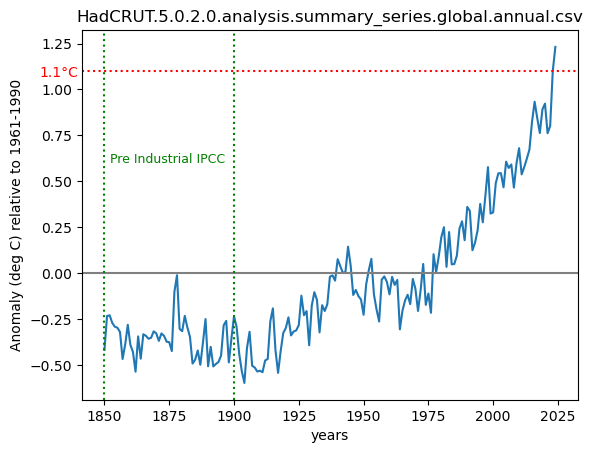

In [5]:
plt.plot("Time", "Anomaly (deg C)", data=df)
plt.xlabel("years")
plt.ylabel("Anomaly (deg C) relative to 1961-1990")
plt.title("HadCRUT.5.0.2.0.analysis.summary_series.global.annual.csv")
plt.axhline(y=0, color="grey", linestyle="-")
# plt.axvline(x = 1961, color = 'r', linestyle = ':')
# plt.axvline(x = 1990, color = 'r', linestyle = ':')
plt.axvline(x=1850, color="g", linestyle=":")
plt.axvline(x=1900, color="g", linestyle=":")
plt.axhline(y=1.1, color="r", linestyle=":")
plt.text(1852, 0.6, "Pre Industrial IPCC", size=9, color="g")
plt.text(1825, 1.07, "1.1°C", size=10, color="r")
plt.savefig(workdir + "/HadCRU_GWL_PI_1961-1990_new_version24.png", bbox_inches="tight")

In [6]:
dfn = df.copy()

# mean from 1971-2000
PI = dfn.query("Time >= 1850 and Time <= 1900").mean()
dfn["Anomaly (deg C)"] = dfn["Anomaly (deg C)"] - PI["Anomaly (deg C)"]

delta = dfn.query("Time >= 1971 and Time <= 2000").mean()
delta

Time                              1985.500000
Anomaly (deg C)                      0.509320
Lower confidence limit (2.5%)        0.117513
Upper confidence limit (97.5%)       0.188138
dtype: float64

In [7]:
print(
    "In HadCru the Temperature changed already in 1971-2000 compare to Pre Industrial 1850-1900 about",
    delta,
    "[deg C]",
)

In HadCru the Temperature changed already in 1971-2000 compare to Pre Industrial 1850-1900 about Time                              1985.500000
Anomaly (deg C)                      0.509320
Lower confidence limit (2.5%)        0.117513
Upper confidence limit (97.5%)       0.188138
dtype: float64 [deg C]


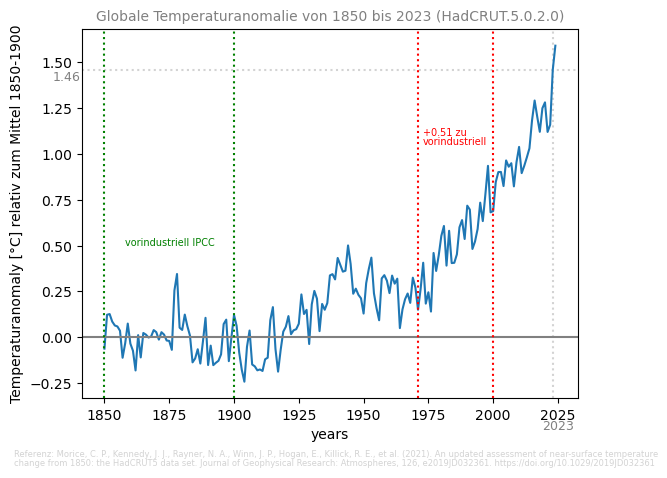

In [8]:
plt.axhline(y=1.456552, color="lightgrey", linestyle=":")
plt.axvline(x=2023, color="lightgrey", linestyle=":")
plt.plot("Time", "Anomaly (deg C)", data=dfn)
plt.xlabel("years")
plt.ylabel("Temperaturanomaly [°C] relativ zum Mittel 1850-1900")
plt.title(
    "Globale Temperaturanomalie von 1850 bis 2023 (HadCRUT.5.0.2.0)",
    size=10,
    color="grey",
)
plt.axhline(y=0, color="grey", linestyle="-")
# plt.axvline(x = 1961, color = 'r', linestyle = ':')
# plt.axvline(x = 1990, color = 'r', linestyle = ':')
plt.axvline(x=1850, color="g", linestyle=":")
plt.axvline(x=1900, color="g", linestyle=":")

plt.text(2019, -0.5, "2023", size=9, color="grey")
plt.text(1830, 1.4, "1.46", size=9, color="grey")
plt.axvline(x=1971, color="r", linestyle=":")
plt.axvline(x=2000, color="r", linestyle=":")
plt.text(1858, 0.5, "vorindustriell IPCC", size=7, color="g")

# plt.text(1973, 1.1, "Historical", size=9, color="r")
plt.text(1973, 1.1, "+0.51 zu", size=7, color="r")
plt.text(1973, 1.05, "vorindustriell", size=7, color="r")
plt.text(
    1815,
    -0.65,
    "Referenz: Morice, C. P., Kennedy, J. J., Rayner, N. A., Winn, J. P., Hogan, E., Killick, R. E., et al. (2021). An updated assessment of near-surface temperature",
    size=6,
    color="lightgrey",
)
plt.text(
    1815,
    -0.7,
    "change from 1850: the HadCRUT5 data set. Journal of Geophysical Research: Atmospheres, 126, e2019JD032361. https://doi.org/10.1029/2019JD032361",
    size=6,
    color="lightgrey",
)
workdir = os.getcwd()
# save plot:
plt.savefig(workdir + "/HadCRU_GWL_PI_new_version24.png", bbox_inches="tight")